In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import textstat

stop_words = set(stopwords.words('english'))

In [2]:
#read tracks_spotify_lang - 
#the file contains the detected language created with the get_language script
tracks_lang=pd.read_csv('data/tracks_spotify_lang.csv')

In [3]:
#Remove rows of repeating lyrics
tracks_lang_no_dup = tracks_lang.drop_duplicates(subset='lyrics', keep='first').reset_index()

#get counts of languages
tracks_lang_no_dup['language'].value_counts().head(10)


language
en    25732
es     6082
pt     1943
fr     1441
de      878
fi      754
it      747
sv      676
da      538
nl      454
Name: count, dtype: int64

In [4]:
#filter for only the english ones
filtered_df = tracks_lang_no_dup[tracks_lang_no_dup['language'].isin(['en'])]
#get number of songs
len(filtered_df)

25732

In [5]:
#lowercasing the lyrics and saving them in new column
filtered_df['lyrics_clean'] = filtered_df['lyrics'].str.lower()
#removing digits
filtered_df['lyrics_clean'] = filtered_df['lyrics_clean'].apply(lambda x: re.sub(r'\d+', '', x))
#removing punctuation
filtered_df['lyrics_clean'] = filtered_df['lyrics_clean'].apply(lambda x: re.sub(r'[^\w\s]', '', x))


/var/folders/bf/3n7wxjyn0rl9rrhzmyw8mb7w0000gn/T/ipykernel_19875/2563621903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['lyrics_clean'] = filtered_df['lyrics'].str.lower()
/var/folders/bf/3n7wxjyn0rl9rrhzmyw8mb7w0000gn/T/ipykernel_19875/2563621903.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['lyrics_clean'] = filtered_df['lyrics_clean'].apply(lambda x: re.sub(r'\d+', '', x))
/var/folders/bf/3n7wxjyn0rl9rrhzmyw8mb7w0000gn/T/ipykernel_19875/2563621903.py:6: SettingWithCo

In [6]:
#get a look of lyrics
filtered_df['lyrics_clean'] 

0          perhaps i am bound to be restless always yea...
1         your gods and my godsdo you or i know which a...
2          closed off from love i didnt need the pain o...
3         pain n an uncomfortable frame of mind that ma...
4         if there were an ocean wed be wading in the d...
                               ...                        
40811      black fingernails red wine i wanna make you ...
40812      i got killed by black bugs on my video game ...
40813     no more maybes your babys got rabies sitting ...
40814     walking down the street with some evil in my ...
40815     theres not enough hours in my day to tell you...
Name: lyrics_clean, Length: 25732, dtype: object

In [7]:
#define a function that removes english stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return " ".join([word for word in words if word.lower() not in stop_words])

#define a funtion that tokenizes the lyrics 
def tokenize_text(text):
    return nltk.word_tokenize(str(text))

In [8]:
#apply the defined funtions
filtered_df['lyrics_clean'] = filtered_df['lyrics_clean'].apply(remove_stopwords)
filtered_df['lyrics_clean'] = filtered_df['lyrics_clean'].apply(tokenize_text)

/var/folders/bf/3n7wxjyn0rl9rrhzmyw8mb7w0000gn/T/ipykernel_19875/3994512763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['lyrics_clean'] = filtered_df['lyrics_clean'].apply(remove_stopwords)
/var/folders/bf/3n7wxjyn0rl9rrhzmyw8mb7w0000gn/T/ipykernel_19875/3994512763.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['lyrics_clean'] = filtered_df['lyrics_clean'].apply(tokenize_text)


In [9]:
#get a look of lyrics
filtered_df['lyrics_clean'] 

0        [perhaps, bound, restless, always, yearning, n...
1        [gods, godsdo, know, stronger, native, proverb...
2        [closed, love, didnt, need, pain, twice, enoug...
3        [pain, n, uncomfortable, frame, mind, may, phy...
4        [ocean, wed, wading, distance, would, water, c...
                               ...                        
40811    [black, fingernails, red, wine, wan, na, make,...
40812    [got, killed, black, bugs, video, game, go, do...
40813    [maybes, babys, got, rabies, sitting, ball, mi...
40814    [walking, street, evil, eye, thoughts, head, m...
40815    [theres, enough, hours, day, tell, youre, gett...
Name: lyrics_clean, Length: 25732, dtype: object

In [10]:
# Flatten the list and count occurrences of each word
all_words = [word for sublist in filtered_df['lyrics_clean']  for word in sublist]
word_frequencies = Counter(all_words)

common_words = word_frequencies.most_common(20)
common_words

NameError: name 'Counter' is not defined

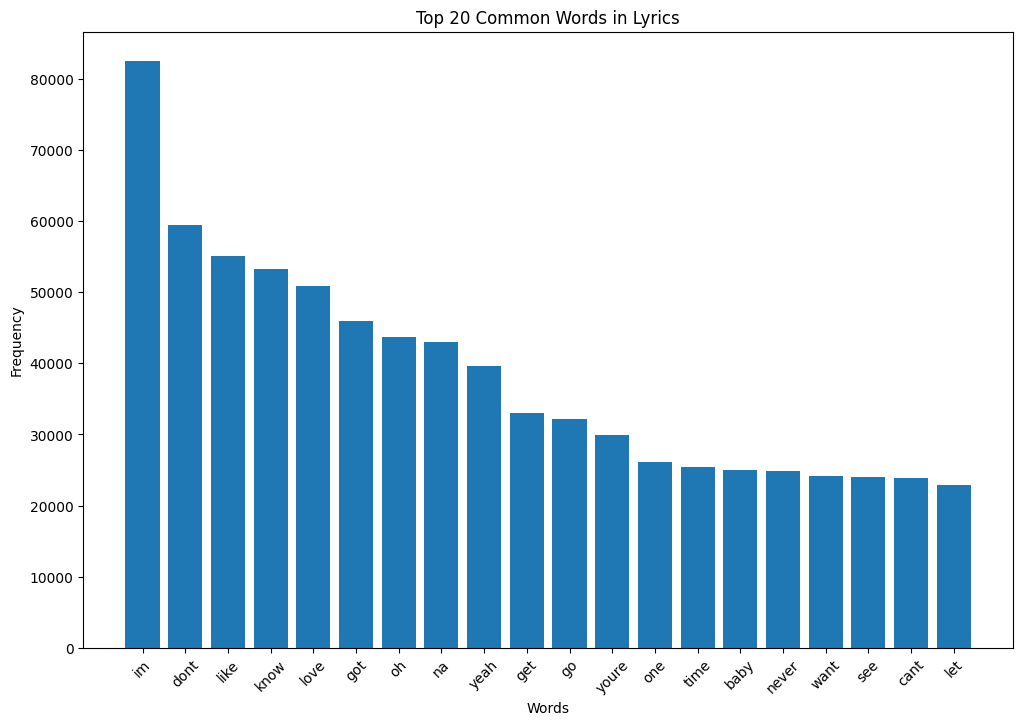

In [ ]:
# Visualizing the most common words
common_words = word_frequencies.most_common(20)
labels, values = zip(*common_words)

plt.figure(figsize=(12, 8))
plt.bar(labels, values)
plt.title('Top 20 Common Words in Lyrics')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

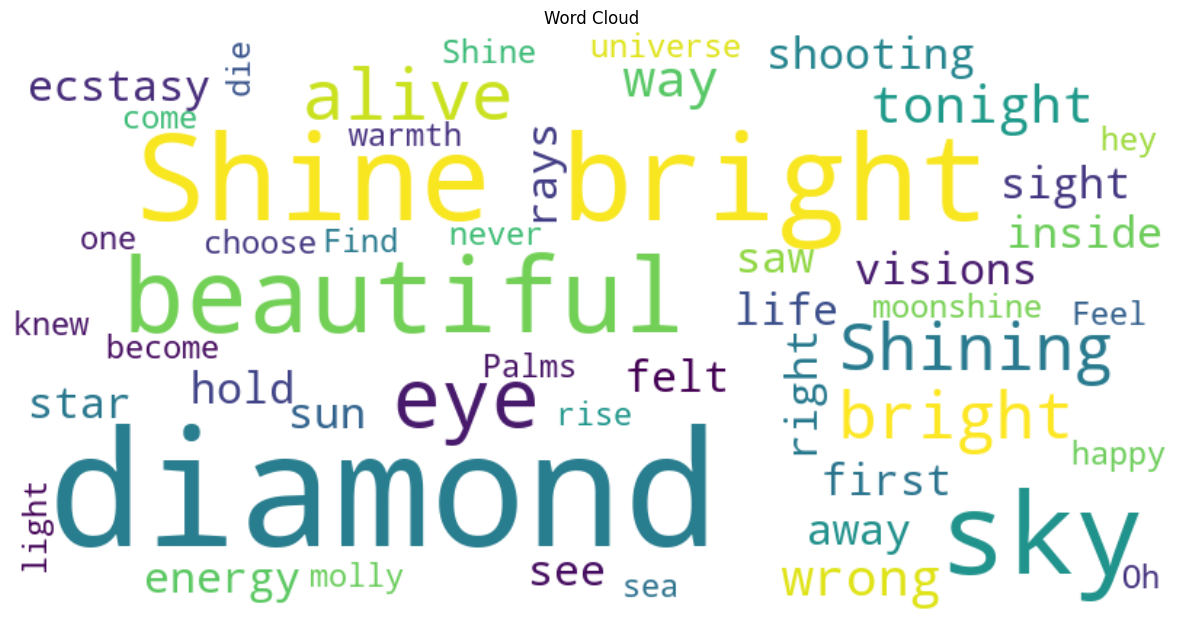

In [ ]:
#filtering for diamonds by Rihanna
diamonds= filtered_df[filtered_df['id'] == '0RKqylCDwg0Lzq8Stu266U'] ['lyrics']
diamonds=filtered_df.iloc[0]

#creating wordcloud
wordcloud = WordCloud(width = 800, height = 400, 
                      random_state=21, max_font_size=110, 
                      background_color='white').generate(str(a))

# Plot the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud')
plt.show()

In [ ]:
#define function that calculates readability metrics
def calculate_readability_metrics(text):
    try:
        ari = textstat.automated_readability_index(text)
        fre = textstat.flesch_reading_ease(text)
        fkgl = textstat.flesch_kincaid_grade(text)
        gfi = textstat.gunning_fog(text)
    except:
        ari, fre, fkgl, gfi = [None]*4  
    
    return pd.Series((ari, fre, fkgl, gfi))

filtered_df['lyrics_str'] = filtered_df['lyrics'].astype(str)
filtered_df[['ARI', 'FRE', 'FKGL', 'GFI']] = filtered_df['lyrics_str'].apply(calculate_readability_metrics)

/var/folders/60/s86dq17j5zd4vn2hf6ywd3200000gn/T/ipykernel_9574/305345220.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['lyrics_str'] = filtered_df['lyrics'].astype(str)
/var/folders/60/s86dq17j5zd4vn2hf6ywd3200000gn/T/ipykernel_9574/305345220.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[['ARI', 'FRE', 'FKGL', 'GFI']] = filtered_df['lyrics_str'].apply(calculate_readability_metrics)


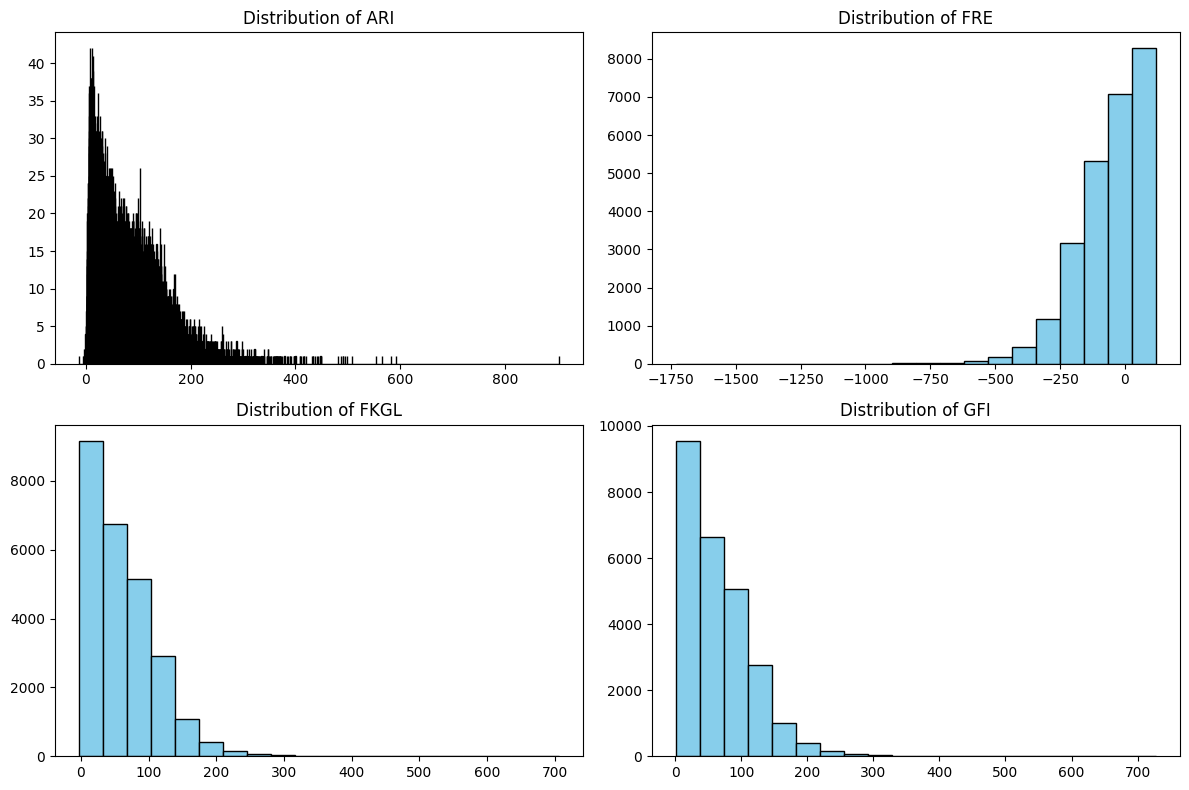

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Histogram of ARI
axs[0, 0].hist(filtered_df['ARI'].dropna(), bins=20000, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Distribution of ARI')

# Histogram of FRE
axs[0, 1].hist(filtered_df['FRE'].dropna(), bins=20, color='skyblue', edgecolor='black')
axs[0, 1].set_title('Distribution of FRE')

# Histogram of FKGL
axs[1, 0].hist(filtered_df['FKGL'].dropna(), bins=20, color='skyblue', edgecolor='black')
axs[1, 0].set_title('Distribution of FKGL')

# Histogram of GFI
axs[1, 1].hist(filtered_df['GFI'].dropna(), bins=20, color='skyblue', edgecolor='black')
axs[1, 1].set_title('Distribution of GFI')

plt.tight_layout()
plt.show()

In [133]:
# Tokenize the text into words
words = [lyrics for sentence in filtered_df['lyrics'] for lyrics in nltk.word_tokenize(sentence)]

# Number of documents
num_documents = len(filtered_df)

# Total number of words in the corpus
total_words = len(words)

# Average document length (in words)
avg_doc_length = total_words / num_documents

# Minimum and maximum document length (in words)
min_doc_length = min(len(nltk.word_tokenize(lyrics)) for lyrics in filtered_df['lyrics'])
max_doc_length = max(len(nltk.word_tokenize(lyrics)) for lyrics in filtered_df['lyrics'])

# Vocabulary size (unique words)
vocabulary_size = len(set(words))

# Most common words and their frequencies
from collections import Counter
word_frequencies = Counter(words)
most_common_words = word_frequencies.most_common(5)

# Stopword removal
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words]

# Average sentence length (in words)
sentence_lengths = [len(nltk.word_tokenize(sentence)) for sentence in filtered_df['lyrics']]
avg_sentence_length = sum(sentence_lengths) / len(sentence_lengths)

# Print the statistics
print(f"Number of Documents: {num_documents}")
print(f"Total Number of Words: {total_words}")
print(f"Average Document Length: {avg_doc_length:.2f} words")
print(f"Minimum Document Length: {min_doc_length} words")
print(f"Maximum Document Length: {max_doc_length} words")
print(f"Vocabulary Size: {vocabulary_size} unique words")
print(f"Most Common Words: {most_common_words}")
print(f"Filtered Words after Stopword Removal: {len(filtered_words)} words")
print(f"Average Sentence Length: {avg_sentence_length:.2f} words")

Number of Documents: 25728
Total Number of Words: 9950490
Average Document Length: 386.76 words
Minimum Document Length: 2 words
Maximum Document Length: 45398 words
Vocabulary Size: 139469 unique words
Most Common Words: [(',', 514354), ('I', 419661), ('the', 288309), ('you', 260889), ('to', 161731)]
Filtered Words after Stopword Removal: 5675367 words
Average Sentence Length: 386.76 words


## Feature Engineering

### TF-IDF

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
df_tfidf = vectorizer.fit_transform(filtered_df['lyrics_str'])
df_tfidf

<25732x107283 sparse matrix of type '<class 'numpy.float64'>'
	with 2051741 stored elements in Compressed Sparse Row format>

### Word2Vec

In [17]:
from gensim.models import Word2Vec
import numpy as np

model_w2v = Word2Vec(sentences=filtered_df['lyrics_clean'].tolist(), vector_size=100, window=5, min_count=1, workers=4)

def get_sentence_vector(words):
    word_vectors = [model_w2v.wv[word] for word in words if word in model_w2v.wv.index_to_key]
    if not word_vectors:
        return np.zeros(model_w2v.vector_size)
    return np.mean(word_vectors, axis=0)

filtered_df['w2v_vector'] = filtered_df['lyrics_clean'].apply(get_sentence_vector)


/var/folders/bf/3n7wxjyn0rl9rrhzmyw8mb7w0000gn/T/ipykernel_19875/368899932.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['w2v_vector'] = filtered_df['lyrics_clean'].apply(get_sentence_vector)


### GloVe

In [20]:
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
import numpy as np

# You'll need to convert the GloVe file format to word2vec format
# You can download pre-trained GloVe embeddings from the GloVe website
glove_input_file = 'glove.6B.100d.txt'  # Modify the path as per your downloaded model
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

# Load the model
glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

def get_glove_sentence_vector(words):
    word_vectors = [glove_model[word] for word in words if word in glove_model.key_to_index]
    if not word_vectors:
        return np.zeros(glove_model.vector_size)
    return np.mean(word_vectors, axis=0)

filtered_df['glove_vector'] = filtered_df['lyrics_clean'].apply(get_glove_sentence_vector)


/var/folders/bf/3n7wxjyn0rl9rrhzmyw8mb7w0000gn/T/ipykernel_19875/3474118581.py:9: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)
/var/folders/bf/3n7wxjyn0rl9rrhzmyw8mb7w0000gn/T/ipykernel_19875/3474118581.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['glove_vector'] = filtered_df['lyrics_clean'].apply(get_glove_sentence_vector)


### FastText

In [25]:
from gensim.models import FastText
import numpy as np

model_ft = FastText(vector_size=100, window=5, min_count=1, sentences=filtered_df['lyrics_clean'].tolist(), epochs=10)

def get_ft_sentence_vector(words):
    word_vectors = [model_ft.wv[word] for word in words if word in model_ft.wv.index_to_key]
    if not word_vectors:
        return np.zeros(model_ft.vector_size)
    return np.mean(word_vectors, axis=0)

filtered_df['ft_vector'] = filtered_df['lyrics_clean'].apply(get_ft_sentence_vector)


/var/folders/bf/3n7wxjyn0rl9rrhzmyw8mb7w0000gn/T/ipykernel_19875/3247512462.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ft_vector'] = filtered_df['lyrics_clean'].apply(get_ft_sentence_vector)


### Doc2Vec

In [22]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(filtered_df['lyrics_clean'].tolist())]
model_d2v = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=100)
model_d2v.build_vocab(documents)
model_d2v.train(documents, total_examples=model_d2v.corpus_count, epochs=model_d2v.epochs)

filtered_df['d2v_vector'] = [model_d2v.dv[i] for i in range(len(filtered_df['lyrics_clean']))]


/var/folders/bf/3n7wxjyn0rl9rrhzmyw8mb7w0000gn/T/ipykernel_19875/794095595.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['d2v_vector'] = [model_d2v.dv[i] for i in range(len(filtered_df['lyrics_clean']))]


### Sentence Embeddings (sBert)


In [26]:
from sentence_transformers import SentenceTransformer

# Initialize the model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Generate embeddings
filtered_df['sbert_vector'] = filtered_df['lyrics_clean'].apply(lambda x: model.encode(' '.join(x)))


/var/folders/bf/3n7wxjyn0rl9rrhzmyw8mb7w0000gn/T/ipykernel_19875/2840678984.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['sbert_vector'] = filtered_df['lyrics_clean'].apply(lambda x: model.encode(' '.join(x)))


In [27]:
filtered_df

,index,acousticness,album_id,analysis_url,artists_id,available_markets,country,danceability,disc_number,duration_ms,...,type,language,confidence,lyrics_clean,lyrics_str,w2v_vector,glove_vector,d2v_vector,ft_vector,sbert_vector
0,0,0.29400,0D3QufeCudpQANOR7luqdr,https://api.spotify.com/v1/audio-analysis/5qlj...,['3mxJuHRn2ZWD5OofvJtDZY'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.698,1.0,235584.0,...,track,en,0.999995,"[perhaps, bound, restless, always, yearning, n...",perhaps bound restless always yearning never s...,"[0.6544756, -0.3229556, -0.139516, 0.22122717,...","[0.016300496, 0.34271294, 0.37241003, -0.16385...","[-1.5367717, -2.4504938, 0.15364909, -3.299925...","[1.0889084, -0.17906623, -1.5707855, -1.269119...","[-0.046746217, -0.17634994, 0.40579668, -0.019..."
1,1,0.86300,1bcqsH5UyTBzmh9YizdsBE,https://api.spotify.com/v1/audio-analysis/3VAX...,['4xWMewm6CYMstu0sPgd9jJ'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,656960.0,...,track,en,0.999997,"[gods, godsdo, know, stronger, native, proverb...",gods godsdo know stronger native proverb east ...,"[0.22900137, -0.011180511, 0.11696933, -0.0378...","[-0.012346554, 0.142385, 0.20282121, -0.249358...","[2.0670466, -1.9952976, -0.78856546, -1.299497...","[0.6557791, 0.046614774, -1.3376333, -0.805199...","[0.18349041, 0.17910825, -0.0504529, -0.278700..."
2,2,0.75000,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1L3Y...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.466,1.0,492840.0,...,track,en,0.999995,"[closed, love, didnt, need, pain, twice, enoug...",closed love didnt need pain twice enough vain ...,"[0.6947316, -0.28599197, -0.29491928, 0.682063...","[-0.07529787, 0.18532664, 0.25859946, -0.17300...","[-1.1369686, 0.56759566, -3.5360346, -0.316745...","[0.71569294, -0.3852827, -1.5801319, 0.3134563...","[-0.27127653, 0.33813798, 0.26504812, 0.256099..."
3,3,0.76300,6FeJF5r8roonnKraJxr4oB,https://api.spotify.com/v1/audio-analysis/6aCe...,['2KQsUB9DRBcJk17JWX1eXD'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,316578.0,...,track,en,0.999998,"[pain, n, uncomfortable, frame, mind, may, phy...",pain n uncomfortable frame mind may physical b...,"[-0.03170229, -0.06108123, 0.18263377, -0.0254...","[-0.07350073, 0.19990432, 0.21373656, 0.010531...","[-1.0665642, 2.9360483, 2.1036134, -2.8190637,...","[0.33878967, -0.22557345, -0.9858403, -0.97439...","[0.05471897, 0.29905123, 0.18562856, -0.030469..."
4,5,0.97100,7CCwkPweMxKq8yWkVerH6T,https://api.spotify.com/v1/audio-analysis/4PrA...,['3kzwYV3OCB010YfXMF0Avt'],"['AE', 'AR', 'BH', 'BO', 'BR', 'CL', 'CO', 'CR...",BE,0.367,1.0,183653.0,...,track,en,0.999997,"[ocean, wed, wading, distance, would, water, c...",ocean wed wading distance would water creating...,"[0.23468369, 0.123190805, 0.14694338, 0.348222...","[-0.2001696, 0.29664358, 0.30343485, -0.061161...","[-2.7153978, 0.94972116, 0.113015994, 0.052836...","[0.7678717, -0.062007383, -0.8720988, -1.32967...","[0.07439018, 0.18220776, 0.2588866, 0.04634476..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40811,101933,0.00837,4PXy3cBCNeY0ZVKTOGi9Cw,https://api.spotify.com/v1/audio-analysis/0ujk...,['3yW6jTzGjHUUkLvLkjLOVn'],"['AU', 'NZ']",AR,0.553,1.0,251253.0,...,track,en,0.999997,"[black, fingernails, red, wine, wan, na, make,...",black fingernails red wine wan na make mine lo...,"[0.44811702, -0.100758, 0.2660182, 0.06938852,...","[-0.048288547, 0.2610699, 0.3593745, -0.176603...","[1.925146, -2.844099, 1.6665615, -1.1851282, -...","[0.5904623, 0.23795933, -1.4836384, -0.4944968...","[0.14479434, 0.21599376, 0.22885923, 0.2102713..."
40812,101934,0.00564,1M9n4vCmOH4lbcHrpt21Qy,https://api.spotify.com/v1/audio-analysis/4e5w...,['6n3YUZcayLRuAunJUUelvz'],"['AU', 'NZ']",AR,0.602,1.0,178893.0,...,track,en,0.999998,"[got, killed, black, bugs, video, game, go, do...",got killed black bugs video game go doesnt mea...,"[0.82594174, 0.50977314, -0.18910752, 0.247966...","[0.